# Project Credit Risk

In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

In [7]:
statlog_german_credit_data = fetch_ucirepo(id=144) 
credit = pd.concat([pd.DataFrame(statlog_german_credit_data.data.features), pd.DataFrame(statlog_german_credit_data.data.targets)], axis=1)
credit.columns = ['checking_status_acc','duration','credit_history','purpose','amount','savings','employment','installment_rate','marital_Gender','other_debtors','present_residence','property','age','other_installment_plans','housing','existing_credits','job','dependents','telephone','foreign_worker', 'credit_risk']
credit.head()

,checking_status_acc,duration,credit_history,purpose,amount,savings,employment,installment_rate,marital_Gender,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
credit.shape

(1000, 21)

In [9]:
print(credit.columns.tolist())

['checking_status_acc', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment', 'installment_rate', 'marital_Gender', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'existing_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'credit_risk']


In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_status_acc      1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment               1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   marital_Gender           1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [11]:
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [12]:
credit.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [13]:
credit['checking_status_acc'].value_counts()

checking_status_acc
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

In [14]:
credit['credit_history'].value_counts()

credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

In [15]:
pd.crosstab(credit.credit_history, credit.credit_risk)

credit_risk,1,2
credit_history,,
A30,15,25
A31,21,28
A32,361,169
A33,60,28
A34,243,50


In [16]:
pd.crosstab(credit.employment, credit.credit_risk)

credit_risk,1,2
employment,,
A71,39,23
A72,102,70
A73,235,104
A74,135,39
A75,189,64


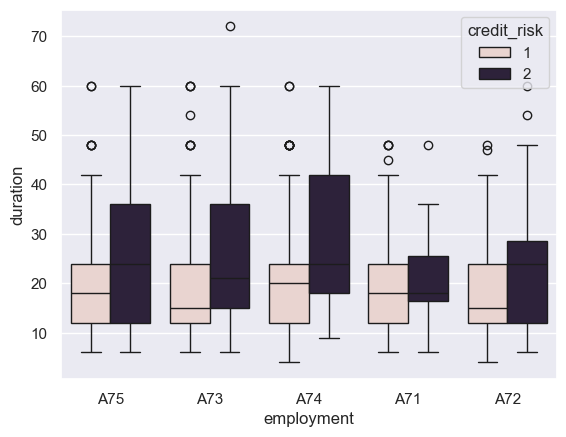

In [50]:
sns.boxplot(x='employment', y='duration', hue='credit_risk', data=credit)
plt.show()

In [18]:
credit.head()

,checking_status_acc,duration,credit_history,purpose,amount,savings,employment,installment_rate,marital_Gender,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [19]:
print(statlog_german_credit_data.metadata) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

### Weight of Evidence (WOE) e Information Value (IV)

In [51]:
for i in credit.drop(columns=['duration', 'amount', 'present_residence', 'age', 'existing_credits', 'dependents', 
                               'installment_rate', 'foreign_worker', 'credit_risk']).columns:
    
    df_woe_iv = (pd.crosstab(credit[i], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
    iv_total = df_woe_iv['iv'].sum()
    
    print(f"Variável: {i}")
    print(f"IV Total: {iv_total:.4f}")
    print(df_woe_iv)
    print('-------------------------------------------------------------------------------------\n')

Variável: checking_status_acc
IV Total: 0.6660
credit_risk                 1         2       woe        iv
checking_status_acc                                        
A11                  0.198571  0.450000  0.818099  0.205693
A12                  0.234286  0.350000  0.401392  0.046447
A13                  0.070000  0.046667 -0.405465  0.009461
A14                  0.497143  0.153333 -1.176263  0.404410
-------------------------------------------------------------------------------------

Variável: credit_history
IV Total: 0.2932
credit_risk            1         2       woe        iv
credit_history                                        
A30             0.021429  0.083333  1.358123  0.084074
A31             0.030000  0.093333  1.134980  0.071882
A32             0.515714  0.563333  0.088319  0.004206
A33             0.085714  0.093333  0.085158  0.000649
A34             0.347143  0.166667 -0.733741  0.132423
-------------------------------------------------------------------------------

<Figure size 1000x1200 with 0 Axes>

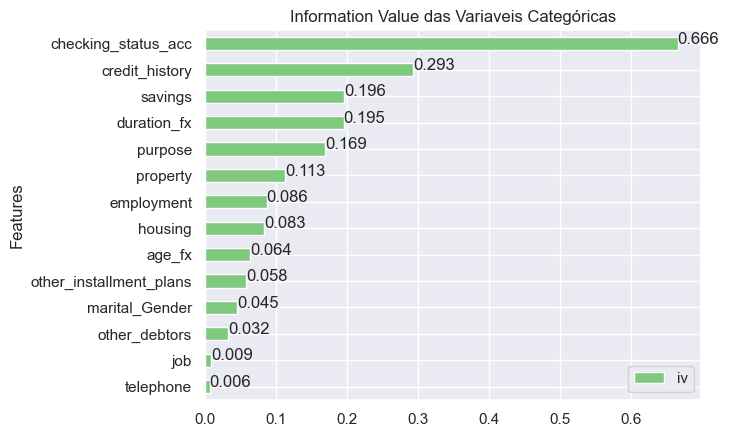

In [52]:
# Variaveis categoricas
columns_cat = credit.drop(columns=['duration', 'amount', 'present_residence', 'age', 'existing_credits', 'dependents', 
                               'installment_rate', 'foreign_worker', 'credit_risk']).columns
    
# Lista para o IV
iv = []

for i in columns_cat:
    df_woe_iv = (pd.crosstab(credit[i], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    iv.append( df_woe_iv['iv'].sum())
    
df_iv = pd.DataFrame({'Features': columns_cat, 'iv': iv}).set_index('Features').sort_values(by = 'iv')

# plot
plt.figure(figsize=(10,12))
df_iv.plot(kind='barh', title='Information Value das Variaveis Categóricas', colormap='Accent')
for index, value in enumerate(list(round(df_iv['iv'], 3))):
    plt.text((value), index, str(value))
plt.legend(loc='lower right')
plt.show()

In [22]:
credit.savings.value_counts()

savings
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64

In [23]:
credit.checking_status_acc.value_counts()

checking_status_acc
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

##### Bins variables continuos 

In [24]:
duration = np.sort(credit.duration.unique())
duration

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22,
       24, 26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 54, 60, 72],
      dtype=int64)

In [25]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [26]:
bins = [3.999, 9, 12, 15, 18, 24, 36, 72.99]

pd.cut(credit['duration'], bins, right=False).value_counts()

duration
[24.0, 36.0)     244
[12.0, 15.0)     187
[36.0, 72.99)    170
[18.0, 24.0)     153
[3.999, 9.0)      94
[9.0, 12.0)       86
[15.0, 18.0)      66
Name: count, dtype: int64

In [27]:
iv, woe = iv_woe(data = credit[['duration', 'credit_risk']], target = 'credit_risk', bins=10, show_woe = True)
print(iv)
print(woe)

Information value of duration is 0.0
   Variable        Cutoff    N  Events  % of Events  Non-Events  \
0  duration  (12.0, 15.0]   72      85     0.065385         -13   
1  duration  (15.0, 18.0]  115     158     0.121538         -43   
2  duration  (18.0, 24.0]  224     290     0.223077         -66   
3  duration  (24.0, 30.0]   57      76     0.058462         -19   
4  duration  (3.999, 9.0]  143     167     0.128462         -24   
5  duration  (30.0, 36.0]   86     124     0.095385         -38   
6  duration  (36.0, 72.0]   87     132     0.101538         -45   
7  duration   (9.0, 12.0]  216     268     0.206154         -52   

   % of Non-Events  WoE  IV  
0        -0.001667  NaN NaN  
1        -0.001667  NaN NaN  
2        -0.001667  NaN NaN  
3        -0.001667  NaN NaN  
4        -0.001667  NaN NaN  
5        -0.001667  NaN NaN  
6        -0.001667  NaN NaN  
7        -0.001667  NaN NaN  
   Variable   IV
0  duration  0.0
   Variable        Cutoff    N  Events  % of Events  No

C:\Users\maylon\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
iv, woe = iv_woe(data = credit[['duration', 'credit_risk']], target = 'credit_risk', bins=10, show_woe = True)


Information value of duration is 0.0
   Variable        Cutoff    N  Events  % of Events  Non-Events  \
0  duration  (12.0, 15.0]   72      85     0.065385         -13   
1  duration  (15.0, 18.0]  115     158     0.121538         -43   
2  duration  (18.0, 24.0]  224     290     0.223077         -66   
3  duration  (24.0, 30.0]   57      76     0.058462         -19   
4  duration  (3.999, 9.0]  143     167     0.128462         -24   
5  duration  (30.0, 36.0]   86     124     0.095385         -38   
6  duration  (36.0, 72.0]   87     132     0.101538         -45   
7  duration   (9.0, 12.0]  216     268     0.206154         -52   

   % of Non-Events  WoE  IV  
0        -0.001667  NaN NaN  
1        -0.001667  NaN NaN  
2        -0.001667  NaN NaN  
3        -0.001667  NaN NaN  
4        -0.001667  NaN NaN  
5        -0.001667  NaN NaN  
6        -0.001667  NaN NaN  
7        -0.001667  NaN NaN  


C:\Users\maylon\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
bins = [0, 10, 20, 30, 40, 72.1]
credit['duration_fx'] = pd.cut(credit['duration'], bins, right=False)
credit['duration_fx'].unique()

[[0.0, 10.0), [40.0, 72.1), [10.0, 20.0), [20.0, 30.0), [30.0, 40.0)]
Categories (5, interval[float64, left]): [[0.0, 10.0) < [10.0, 20.0) < [20.0, 30.0) < [30.0, 40.0) < [40.0, 72.1)]

In [30]:
credit['duration_fx'].value_counts()/credit.shape[0]

duration_fx
[10.0, 20.0)    0.403
[20.0, 30.0)    0.241
[0.0, 10.0)     0.143
[30.0, 40.0)    0.131
[40.0, 72.1)    0.082
Name: count, dtype: float64

In [31]:
def plot_by_woe(df_woe, rotation_of_x_axis_labels = 0):
    x = np.array(df_woe.index.astype(str))
    y = df_woe['woe']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_woe_iv.index.name)
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_woe_iv.index.name))
    plt.xticks(rotation = rotation_of_x_axis_labels)

Variável: duration_fx
IV Total: 0.1953
credit_risk          1         2       woe        iv
duration_fx                                         
[0.0, 10.0)   0.170000  0.080000 -0.753772  0.067839
[10.0, 20.0)  0.421429  0.360000 -0.157546  0.009678
[20.0, 30.0)  0.241429  0.240000 -0.005935  0.000008
[30.0, 40.0)  0.112857  0.173333  0.429094  0.025950
[40.0, 72.1)  0.054286  0.146667  0.993901  0.091818
-------------------------------------------------------------------------------------



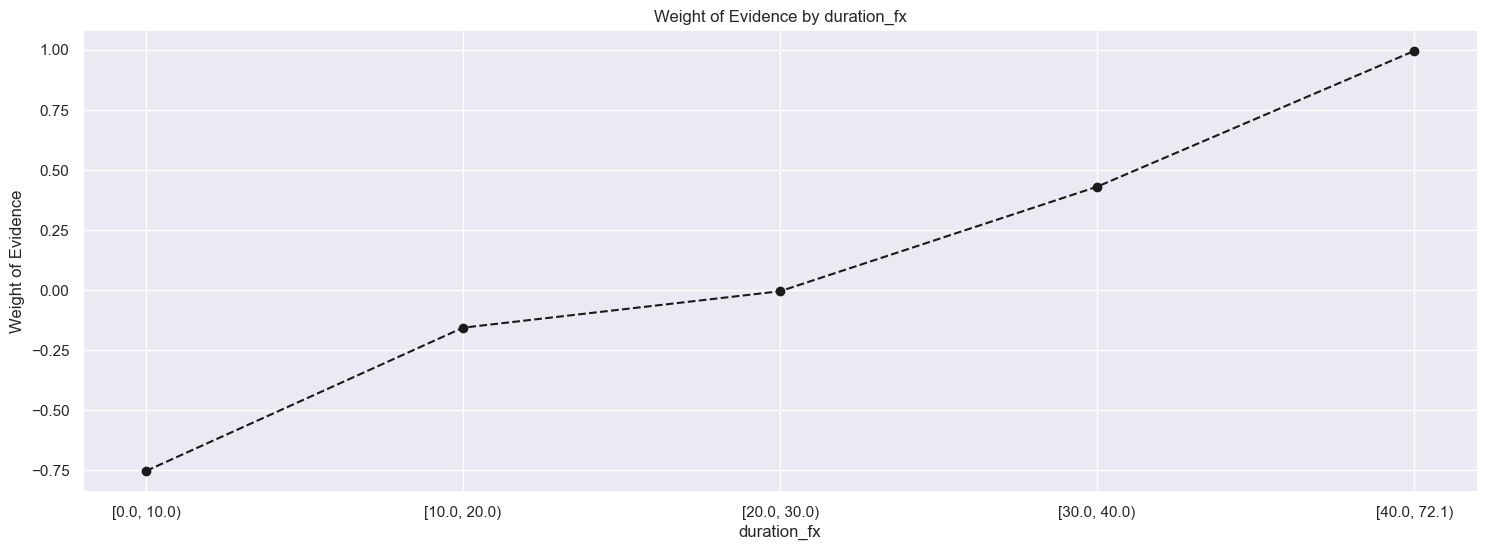

In [53]:
df_woe_iv = (pd.crosstab(credit['duration_fx'], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
iv_total = df_woe_iv['iv'].sum()
    
print(f"Variável: {'duration_fx'}")
print(f"IV Total: {iv_total:.4f}")
print(df_woe_iv)
print('-------------------------------------------------------------------------------------\n')

plot_by_woe(df_woe_iv)

In [33]:
np.array(df_woe_iv.index.tolist())


array([Interval(0.0, 10.0, closed='left'),
       Interval(10.0, 20.0, closed='left'),
       Interval(20.0, 30.0, closed='left'),
       Interval(30.0, 40.0, closed='left'),
       Interval(40.0, 72.1, closed='left')], dtype=object)

Variável: present_residence
IV Total: 0.0036
credit_risk               1         2       woe            iv
present_residence                                            
1                  0.134286  0.120000 -0.112478  1.606828e-03
2                  0.301429  0.323333  0.070151  1.536634e-03
3                  0.151429  0.143333 -0.054941  4.447614e-04
4                  0.412857  0.413333  0.001153  5.489228e-07
-------------------------------------------------------------------------------------



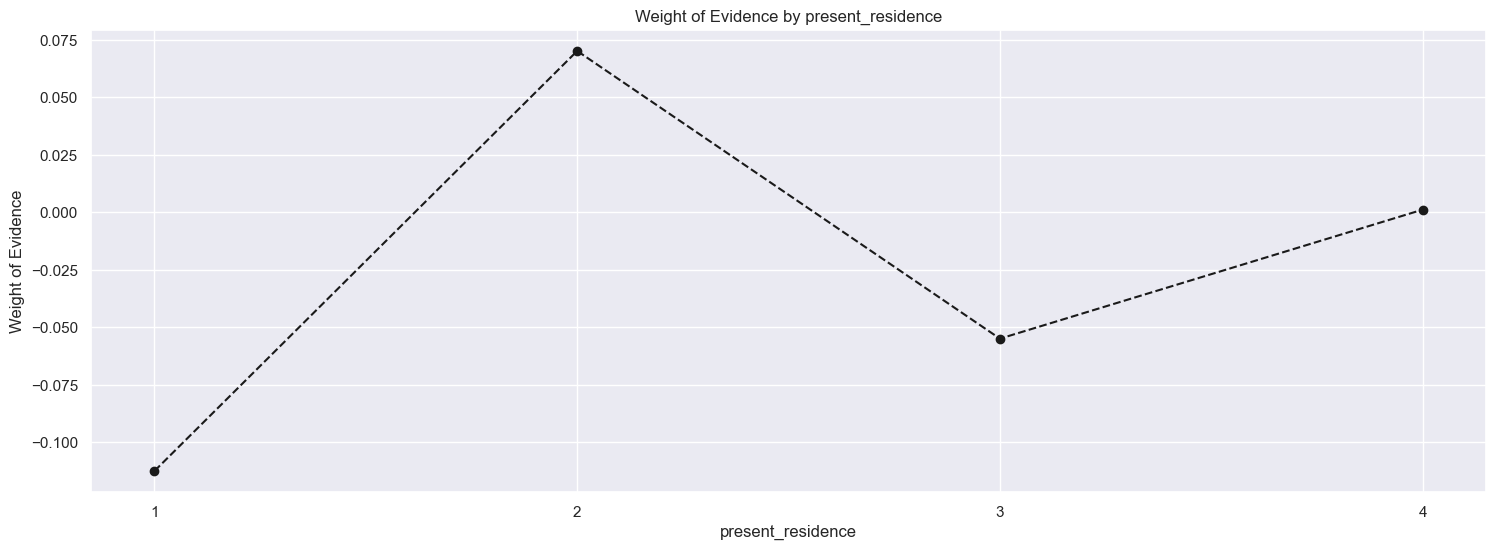

In [54]:
df_woe_iv = (pd.crosstab(credit['present_residence'], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
iv_total = df_woe_iv['iv'].sum()
    
print(f"Variável: {'present_residence'}")
print(f"IV Total: {iv_total:.4f}")
print(df_woe_iv)
print('-------------------------------------------------------------------------------------\n')
plot_by_woe(df_woe_iv)

In [55]:
print(np.sort(credit['age'].unique()))

bins = [20, 30, 40, 50, 60, 75.1]
credit['age_fx'] = pd.cut(credit['age'], bins, right=False)
credit['age_fx'].value_counts()

[19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 70 74 75]


age_fx
[20.0, 30.0)    369
[30.0, 40.0)    330
[40.0, 50.0)    174
[50.0, 60.0)     74
[60.0, 75.1)     51
Name: count, dtype: int64

Variável: age_fx
IV Total: 0.0636
credit_risk          1         2       woe        iv
age_fx                                              
[20.0, 30.0)  0.333333  0.454849  0.310824  0.037770
[30.0, 40.0)  0.350501  0.284281 -0.209400  0.013866
[40.0, 50.0)  0.185980  0.147157 -0.234138  0.009090
[50.0, 60.0)  0.075823  0.070234 -0.076562  0.000428
[60.0, 75.1)  0.054363  0.043478 -0.223430  0.002432
-------------------------------------------------------------------------------------



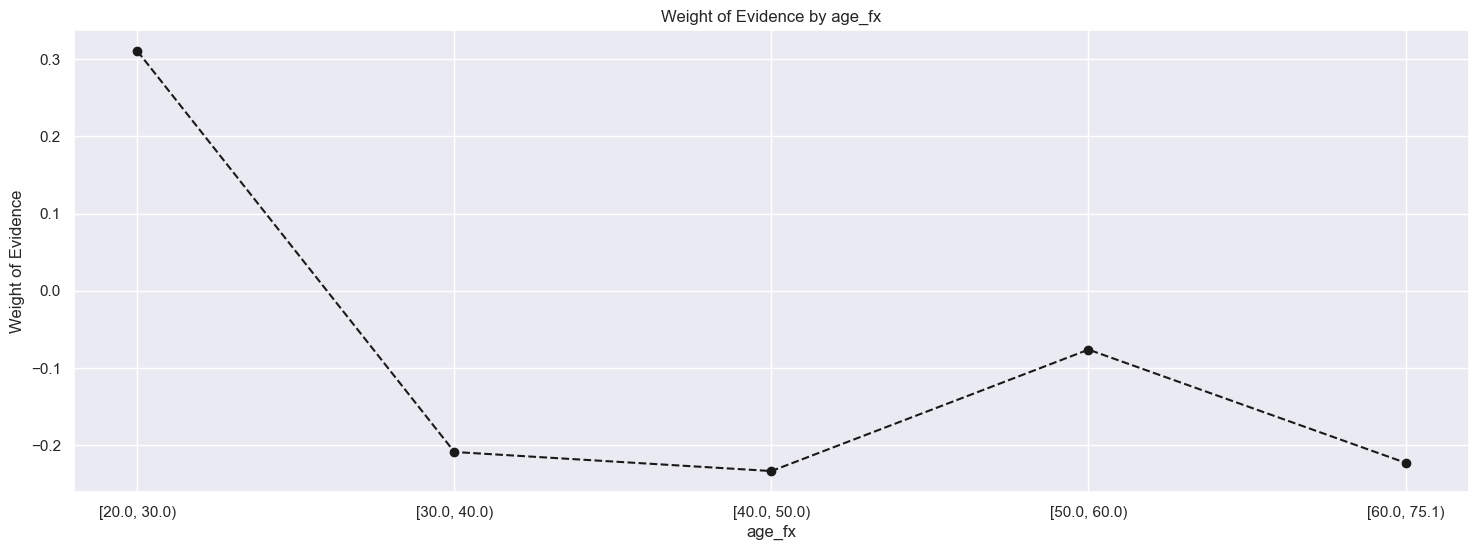

In [56]:
df_woe_iv = (pd.crosstab(credit['age_fx'], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
iv_total = df_woe_iv['iv'].sum()
    
print(f"Variável: {'age_fx'}")
print(f"IV Total: {iv_total:.4f}")
print(df_woe_iv)
print('-------------------------------------------------------------------------------------\n')
plot_by_woe(df_woe_iv)

C:\Users\maylon\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Variável: age
IV Total: inf
credit_risk         1         2       woe        iv
age                                                
19           0.001429  0.003333  0.847298  0.001614
20           0.012857  0.016667  0.259511  0.000989
21           0.012857  0.016667  0.259511  0.000989
22           0.022857  0.036667  0.472604  0.006526
23           0.040000  0.066667  0.510826  0.013622
24           0.035714  0.063333  0.572861  0.015822
25           0.031429  0.063333  0.700694  0.022355
26           0.051429  0.046667 -0.097164  0.000463
27           0.054286  0.043333 -0.225339  0.002468
28           0.040000  0.050000  0.223144  0.002231
29           0.031429  0.050000  0.464306  0.008623
30           0.041429  0.036667 -0.122103  0.000581
31           0.038571  0.036667 -0.050644  0.000096
32           0.035714  0.030000 -0.174353  0.000996
33           0.028571  0.043333  0.416515  0.006149
34           0.030000  0.036667  0.200671  0.001338
35           0.048571  0.020000 -0.8

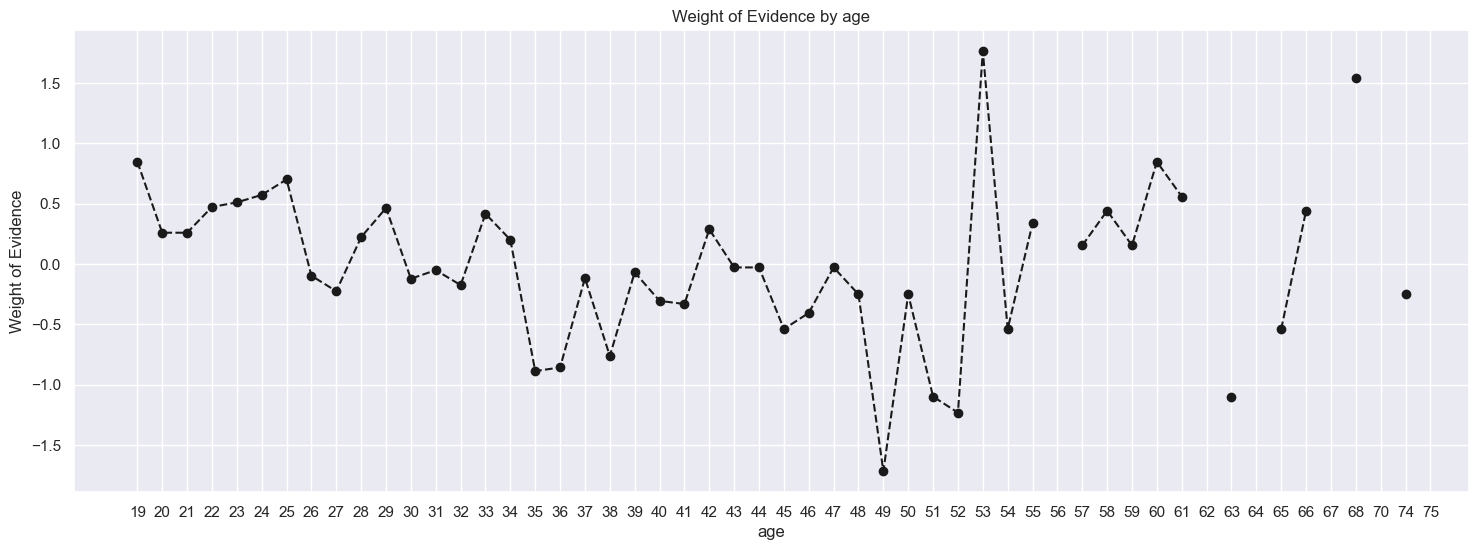

In [57]:
df_woe_iv = (pd.crosstab(credit['age'], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
iv_total = df_woe_iv['iv'].sum()
    
print(f"Variável: {'age'}")
print(f"IV Total: {iv_total:.4f}")
print(df_woe_iv)
print('-------------------------------------------------------------------------------------\n')
plot_by_woe(df_woe_iv)

In [58]:
print(np.sort(credit['existing_credits'].unique()))
credit['existing_credits'].value_counts()/credit.shape[0]

[1 2 3 4]


existing_credits
1    0.633
2    0.333
3    0.028
4    0.006
Name: count, dtype: float64

Variável: existing_credits
IV Total: 0.0133
credit_risk              1         2       woe        iv
existing_credits                                        
1                 0.618571  0.666667  0.074877  0.003601
2                 0.344286  0.306667 -0.115710  0.004353
3                 0.031429  0.020000 -0.451985  0.005166
4                 0.005714  0.006667  0.154151  0.000147
-------------------------------------------------------------------------------------



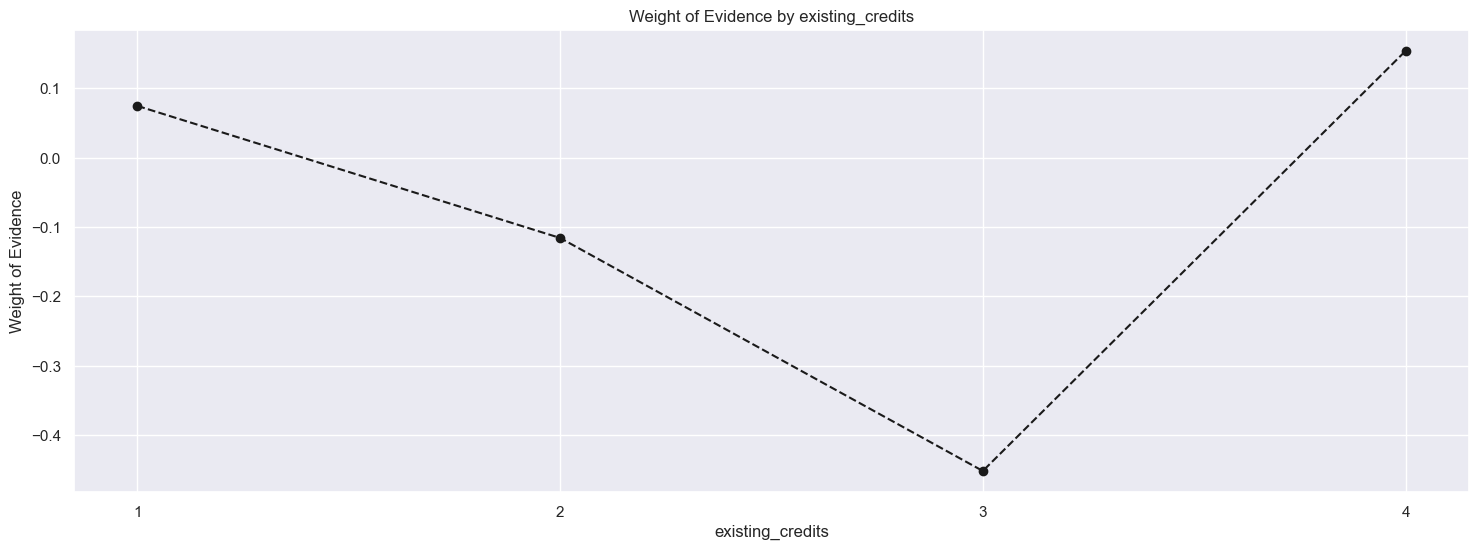

In [59]:
df_woe_iv = (pd.crosstab(credit['existing_credits'], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
iv_total = df_woe_iv['iv'].sum()
    
print(f"Variável: {'existing_credits'}")
print(f"IV Total: {iv_total:.4f}")
print(df_woe_iv)
print('-------------------------------------------------------------------------------------\n')
plot_by_woe(df_woe_iv)

In [60]:
print(np.sort(credit['dependents'].unique()))
credit['dependents'].value_counts()/credit.shape[0]

[1 2]


dependents
1    0.845
2    0.155
Name: count, dtype: float64

Variável: dependents
IV Total: 0.0000
credit_risk         1         2       woe        iv
dependents                                         
1            0.844286  0.846667  0.002816  0.000007
2            0.155714  0.153333 -0.015409  0.000037
-------------------------------------------------------------------------------------



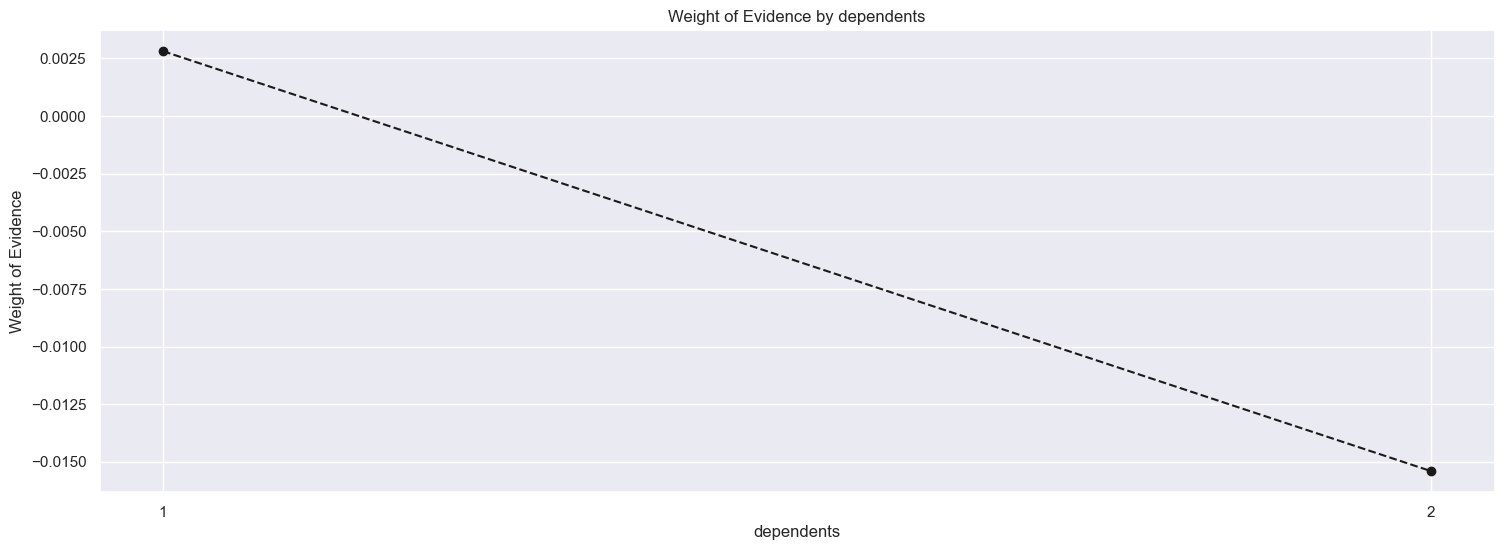

In [61]:
df_woe_iv = (pd.crosstab(credit['dependents'], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
iv_total = df_woe_iv['iv'].sum()
    
print(f"Variável: {'dependents'}")
print(f"IV Total: {iv_total:.4f}")
print(df_woe_iv)
print('-------------------------------------------------------------------------------------\n')
plot_by_woe(df_woe_iv)

In [62]:
print(np.sort(credit['installment_rate'].unique()))
credit['installment_rate'].value_counts()/credit.shape[0]

[1 2 3 4]


installment_rate
4    0.476
2    0.231
3    0.157
1    0.136
Name: count, dtype: float64

Variável: installment_rate
IV Total: 0.0263
credit_risk              1         2       woe        iv
installment_rate                                        
1                 0.145714  0.113333 -0.251314  0.008138
2                 0.241429  0.206667 -0.155466  0.005404
3                 0.160000  0.150000 -0.064539  0.000645
4                 0.452857  0.530000  0.157300  0.012135
-------------------------------------------------------------------------------------



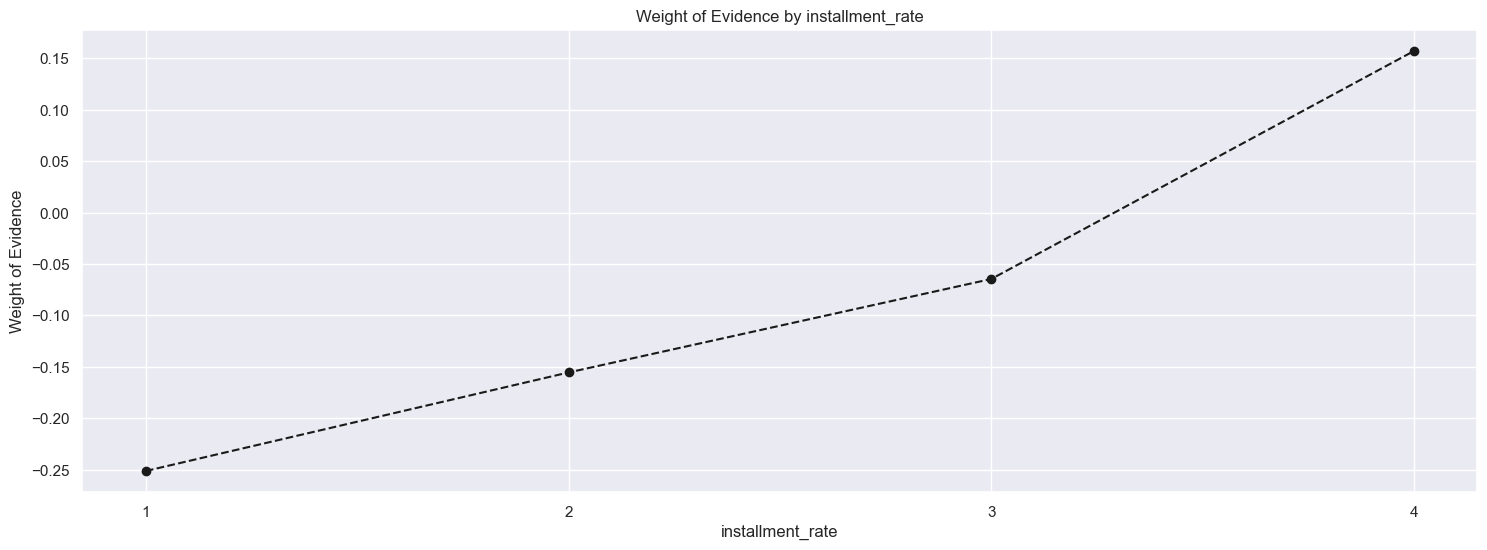

In [63]:
df_woe_iv = (pd.crosstab(credit['installment_rate'], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
iv_total = df_woe_iv['iv'].sum()
    
print(f"Variável: {'installment_rate'}")
print(f"IV Total: {iv_total:.4f}")
print(df_woe_iv)
print('-------------------------------------------------------------------------------------\n')
plot_by_woe(df_woe_iv)

In [64]:
print(np.sort(credit['foreign_worker'].unique()))
credit['foreign_worker'].value_counts()/credit.shape[0]

['A201' 'A202']


foreign_worker
A201    0.963
A202    0.037
Name: count, dtype: float64

In [65]:
df_woe_iv = (pd.crosstab(credit['foreign_worker'], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
iv_total = df_woe_iv['iv'].sum()
    
print(f"Variável: {'foreign_worker'}")
print(f"IV Total: {iv_total:.4f}")
print(df_woe_iv)
print('-------------------------------------------------------------------------------------\n')

Variável: foreign_worker
IV Total: 0.0439
credit_risk            1         2       woe        iv
foreign_worker                                        
A201            0.952857  0.986667  0.034867  0.001179
A202            0.047143  0.013333 -1.262915  0.042699
-------------------------------------------------------------------------------------



In [66]:
credit.head()

,checking_status_acc,duration,credit_history,purpose,amount,savings,employment,installment_rate,marital_Gender,other_debtors,...,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk,duration_fx,age_fx
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A143,A152,2,A173,1,A192,A201,1,"[0.0, 10.0)","[60.0, 75.1)"
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A143,A152,1,A173,1,A191,A201,2,"[40.0, 72.1)","[20.0, 30.0)"
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A143,A152,1,A172,2,A191,A201,1,"[10.0, 20.0)","[40.0, 50.0)"
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A143,A153,1,A173,2,A191,A201,1,"[40.0, 72.1)","[40.0, 50.0)"
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A143,A153,2,A173,2,A191,A201,2,"[20.0, 30.0)","[50.0, 60.0)"


In [67]:
credit.installment_rate.unique()

array([4, 2, 3, 1], dtype=int64)

Variável: checking_status_acc
IV Total: 0.6660

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
checking_status_acc,,,,,,,,
A11,274,0.274,139,135,0.1986,0.4500,0.8181,0.2057
A12,269,0.269,164,105,0.2343,0.3500,0.4014,0.0464
A13,63,0.063,49,14,0.0700,0.0467,-0.4055,0.0095
A14,394,0.394,348,46,0.4971,0.1533,-1.1763,0.4044


--------------------------------------------------------------------------------
Variável: credit_history
IV Total: 0.2932

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
credit_history,,,,,,,,
A30,40,0.040,15,25,0.0214,0.0833,1.3581,0.0841
A31,49,0.049,21,28,0.0300,0.0933,1.1350,0.0719
A32,530,0.530,361,169,0.5157,0.5633,0.0883,0.0042
A33,88,0.088,60,28,0.0857,0.0933,0.0852,0.0006
A34,293,0.293,243,50,0.3471,0.1667,-0.7337,0.1324


--------------------------------------------------------------------------------
Variável: purpose
IV Total: 0.1692

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
purpose,,,,,,,,
A40,234,0.234,145,89,0.2071,0.2967,0.3592,0.0322
A41,103,0.103,86,17,0.1229,0.0567,-0.7738,0.0512
A410,12,0.012,7,5,0.0100,0.0167,0.5108,0.0034
A42,181,0.181,123,58,0.1757,0.1933,0.0956,0.0017
A43,280,0.280,218,62,0.3114,0.2067,-0.4101,0.0430
A44,12,0.012,8,4,0.0114,0.0133,0.1542,0.0003
A45,22,0.022,14,8,0.0200,0.0267,0.2877,0.0019
A46,50,0.050,28,22,0.0400,0.0733,0.6061,0.0202
A48,9,0.009,8,1,0.0114,0.0033,-1.2321,0.0100


--------------------------------------------------------------------------------
Variável: savings
IV Total: 0.1960

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
savings,,,,,,,,
A61,603,0.603,386,217,0.5514,0.7233,0.2714,0.0466
A62,103,0.103,69,34,0.0986,0.1133,0.1396,0.0021
A63,63,0.063,52,11,0.0743,0.0367,-0.7061,0.0266
A64,48,0.048,42,6,0.0600,0.0200,-1.0986,0.0439
A65,183,0.183,151,32,0.2157,0.1067,-0.7042,0.0768


--------------------------------------------------------------------------------
Variável: employment
IV Total: 0.0864

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
employment,,,,,,,,
A71,62,0.062,39,23,0.0557,0.0767,0.3192,0.0067
A72,172,0.172,102,70,0.1457,0.2333,0.4708,0.0413
A73,339,0.339,235,104,0.3357,0.3467,0.0321,0.0004
A74,174,0.174,135,39,0.1929,0.1300,-0.3944,0.0248
A75,253,0.253,189,64,0.2700,0.2133,-0.2356,0.0133


--------------------------------------------------------------------------------
Variável: marital_Gender
IV Total: 0.0447

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
marital_Gender,,,,,,,,
A91,50,0.050,30,20,0.0429,0.0667,0.4418,0.0105
A92,310,0.310,201,109,0.2871,0.3633,0.2353,0.0179
A93,548,0.548,402,146,0.5743,0.4867,-0.1655,0.0145
A94,92,0.092,67,25,0.0957,0.0833,-0.1385,0.0017


--------------------------------------------------------------------------------
Variável: other_debtors
IV Total: 0.0320

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
other_debtors,,,,,,,,
A101,907,0.907,635,272,0.9071,0.9067,-0.0005,0.0000
A102,41,0.041,23,18,0.0329,0.0600,0.6022,0.0163
A103,52,0.052,42,10,0.0600,0.0333,-0.5878,0.0157


--------------------------------------------------------------------------------
Variável: property
IV Total: 0.1126

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
property,,,,,,,,
A121,282,0.282,222,60,0.3171,0.2000,-0.4610,0.0540
A122,232,0.232,161,71,0.2300,0.2367,0.0286,0.0002
A123,332,0.332,230,102,0.3286,0.3400,0.0342,0.0004
A124,154,0.154,87,67,0.1243,0.2233,0.5861,0.0581


--------------------------------------------------------------------------------
Variável: other_installment_plans
IV Total: 0.0576

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
other_installment_plans,,,,,,,,
A141,139,0.139,82,57,0.1171,0.1900,0.4836,0.0352
A142,47,0.047,28,19,0.0400,0.0633,0.4595,0.0107
A143,814,0.814,590,224,0.8429,0.7467,-0.1212,0.0117


--------------------------------------------------------------------------------
Variável: housing
IV Total: 0.0833

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
housing,,,,,,,,
A151,179,0.179,109,70,0.1557,0.2333,0.4044,0.0314
A152,713,0.713,527,186,0.7529,0.6200,-0.1942,0.0258
A153,108,0.108,64,44,0.0914,0.1467,0.4726,0.0261


--------------------------------------------------------------------------------
Variável: job
IV Total: 0.0088

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
job,,,,,,,,
A171,22,0.022,15,7,0.0214,0.0233,0.0852,0.0002
A172,200,0.200,144,56,0.2057,0.1867,-0.0972,0.0019
A173,630,0.630,444,186,0.6343,0.6200,-0.0228,0.0003
A174,148,0.148,97,51,0.1386,0.1700,0.2044,0.0064


--------------------------------------------------------------------------------
Variável: telephone
IV Total: 0.0064

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
telephone,,,,,,,,
A191,596,0.596,409,187,0.5843,0.6233,0.0647,0.0025
A192,404,0.404,291,113,0.4157,0.3767,-0.0986,0.0039


--------------------------------------------------------------------------------
Variável: duration_fx
IV Total: 0.1953

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
duration_fx,,,,,,,,
"[0.0, 10.0)",143,0.143,119,24,0.1700,0.0800,-0.7538,0.0678
"[10.0, 20.0)",403,0.403,295,108,0.4214,0.3600,-0.1575,0.0097
"[20.0, 30.0)",241,0.241,169,72,0.2414,0.2400,-0.0059,0.0000
"[30.0, 40.0)",131,0.131,79,52,0.1129,0.1733,0.4291,0.0259
"[40.0, 72.1)",82,0.082,38,44,0.0543,0.1467,0.9939,0.0918


--------------------------------------------------------------------------------
Variável: age_fx
IV Total: 0.0636

DataFrame WOE_IV:


credit_risk,N,prop_N,N_bom,N_mau,prop_bom,prop_mau,woe,iv
age_fx,,,,,,,,
"[20.0, 30.0)",369,0.369,233,136,0.3333,0.4548,0.3108,0.0378
"[30.0, 40.0)",330,0.330,245,85,0.3505,0.2843,-0.2094,0.0139
"[40.0, 50.0)",174,0.174,130,44,0.1860,0.1472,-0.2341,0.0091
"[50.0, 60.0)",74,0.074,53,21,0.0758,0.0702,-0.0766,0.0004
"[60.0, 75.1)",51,0.051,38,13,0.0544,0.0435,-0.2234,0.0024


--------------------------------------------------------------------------------


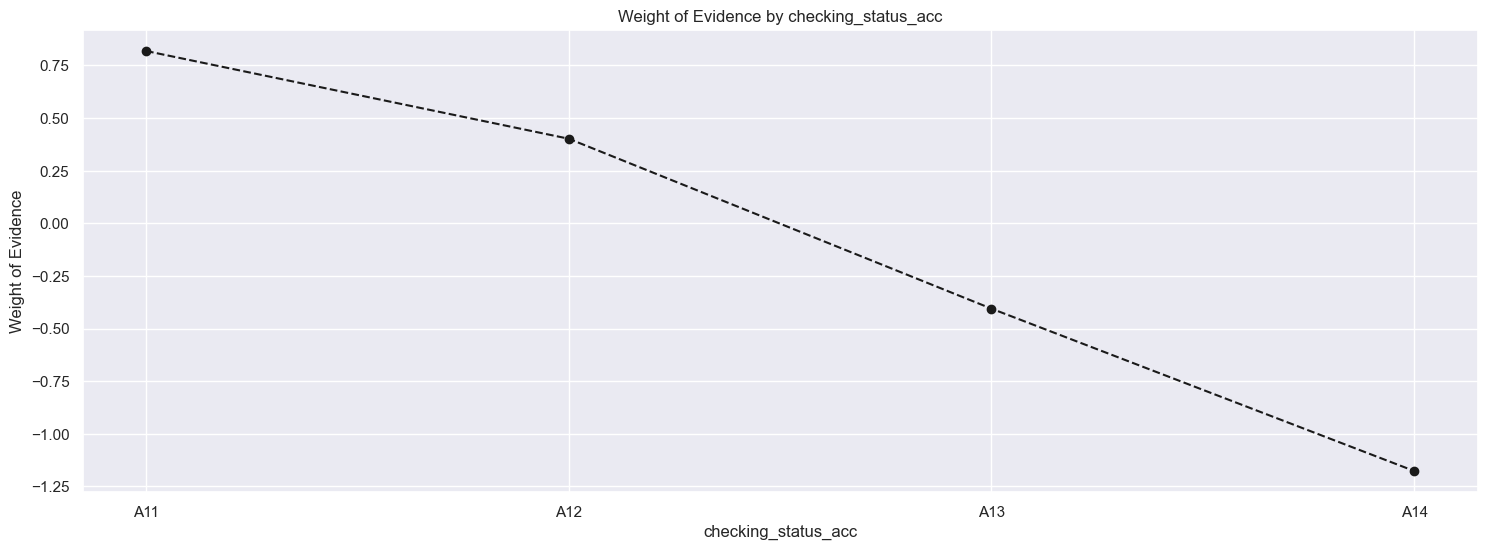

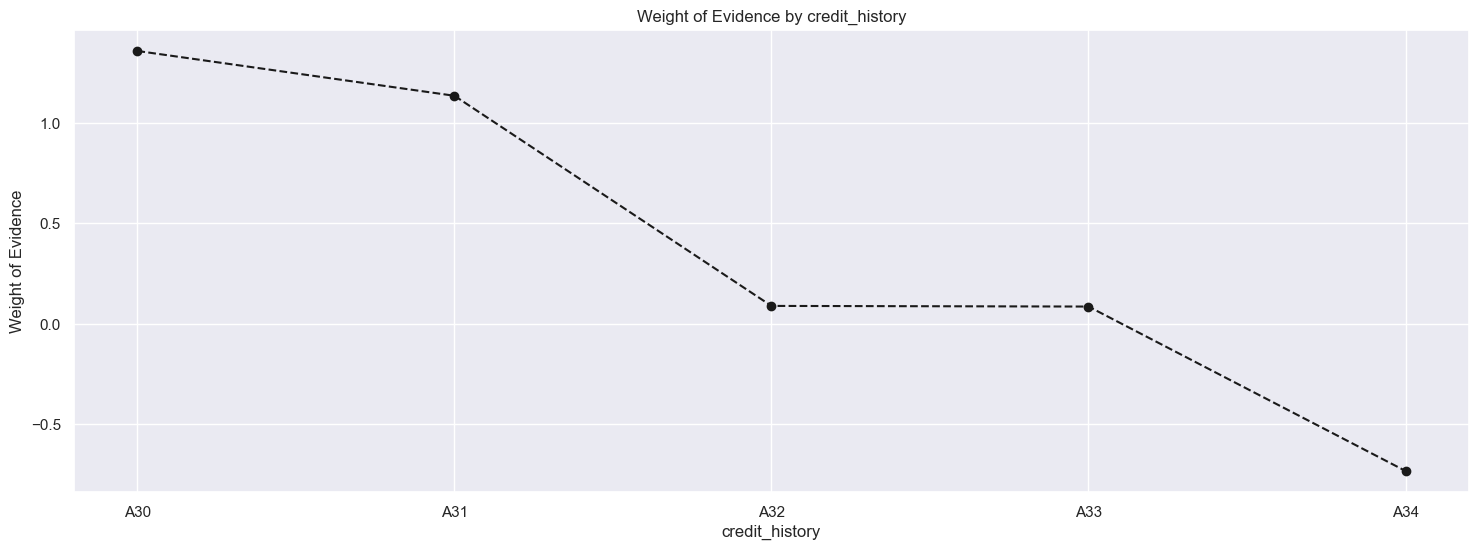

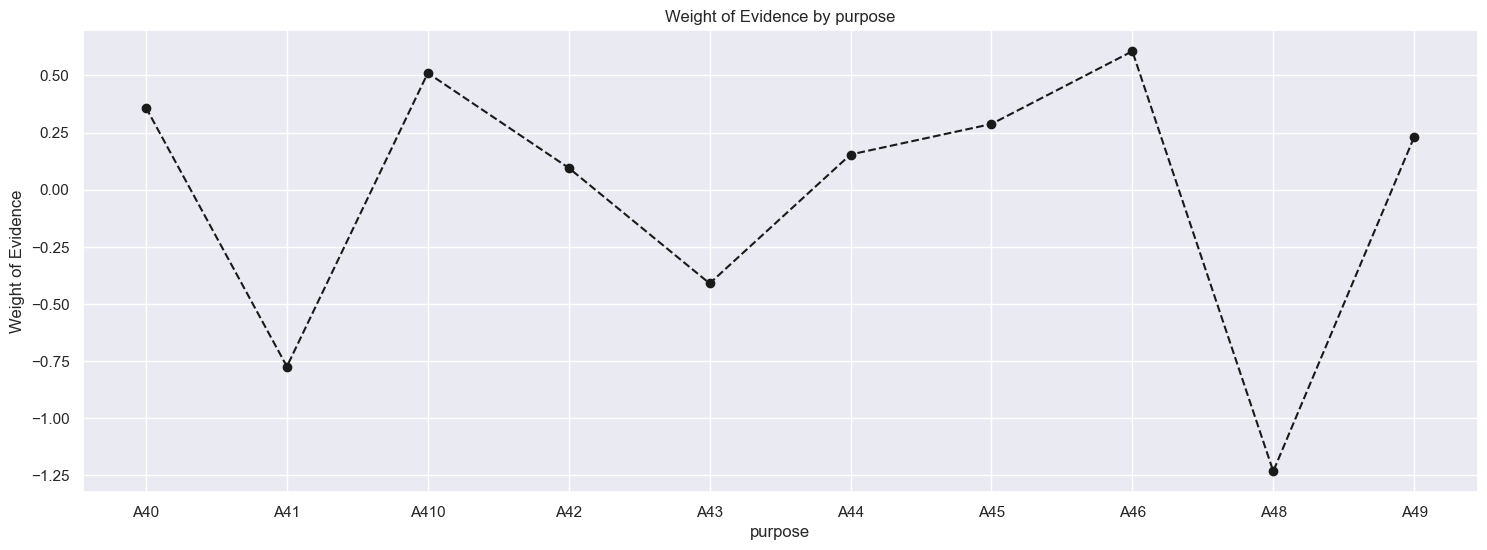

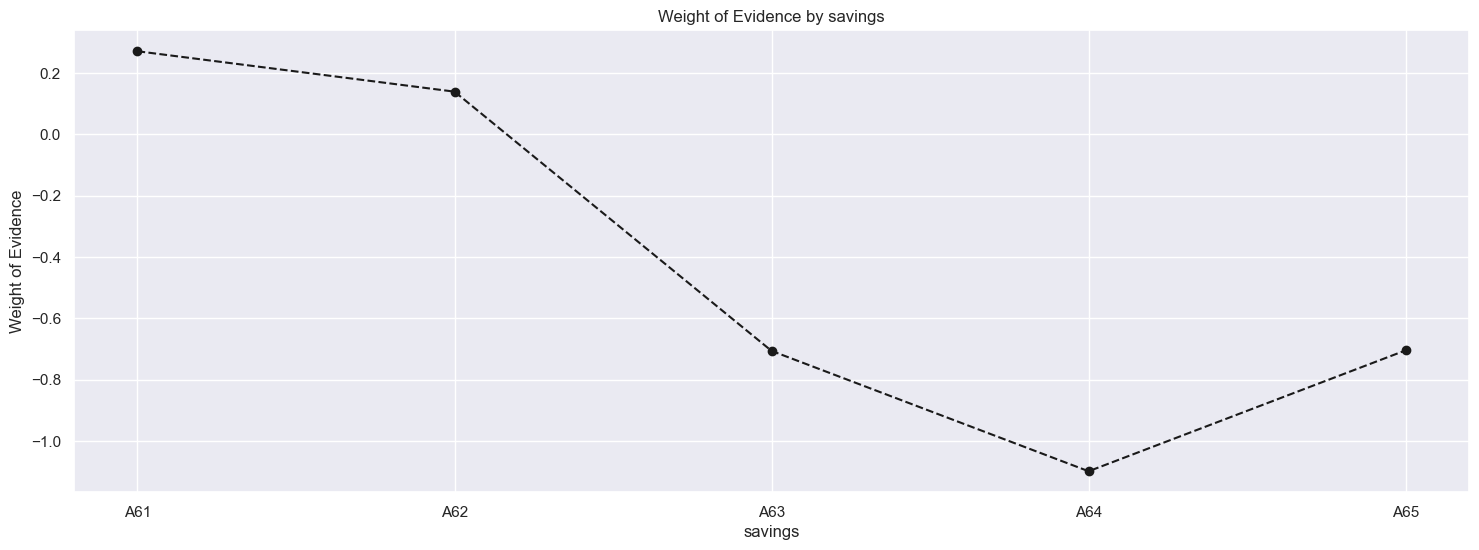

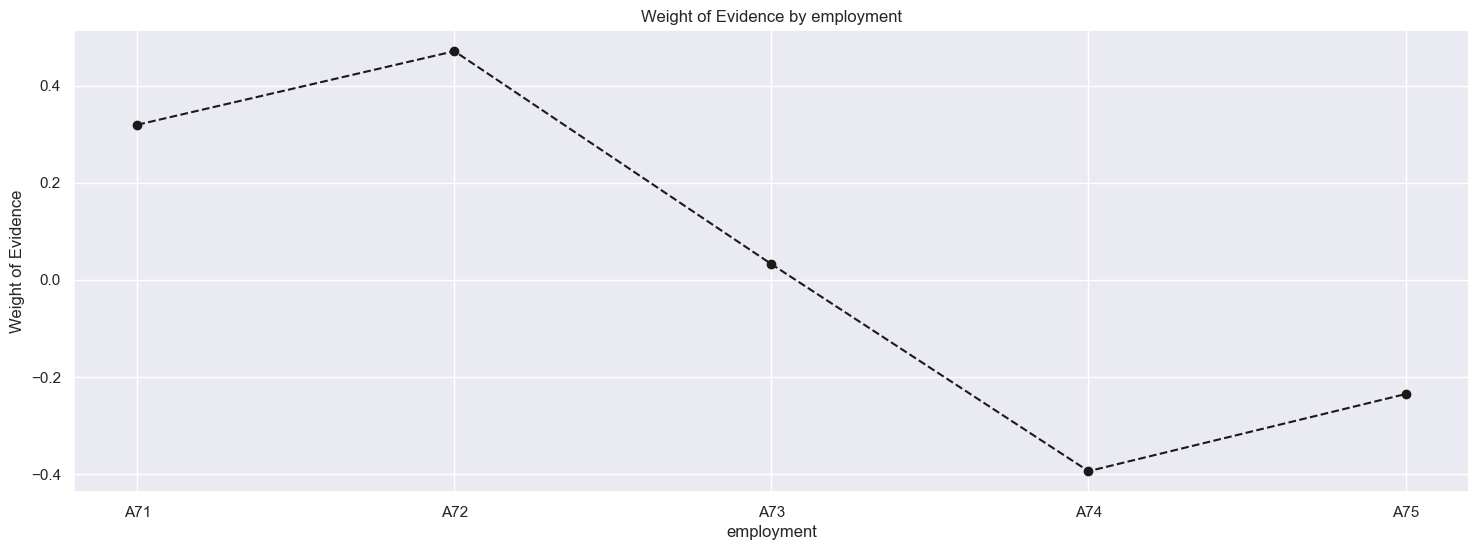

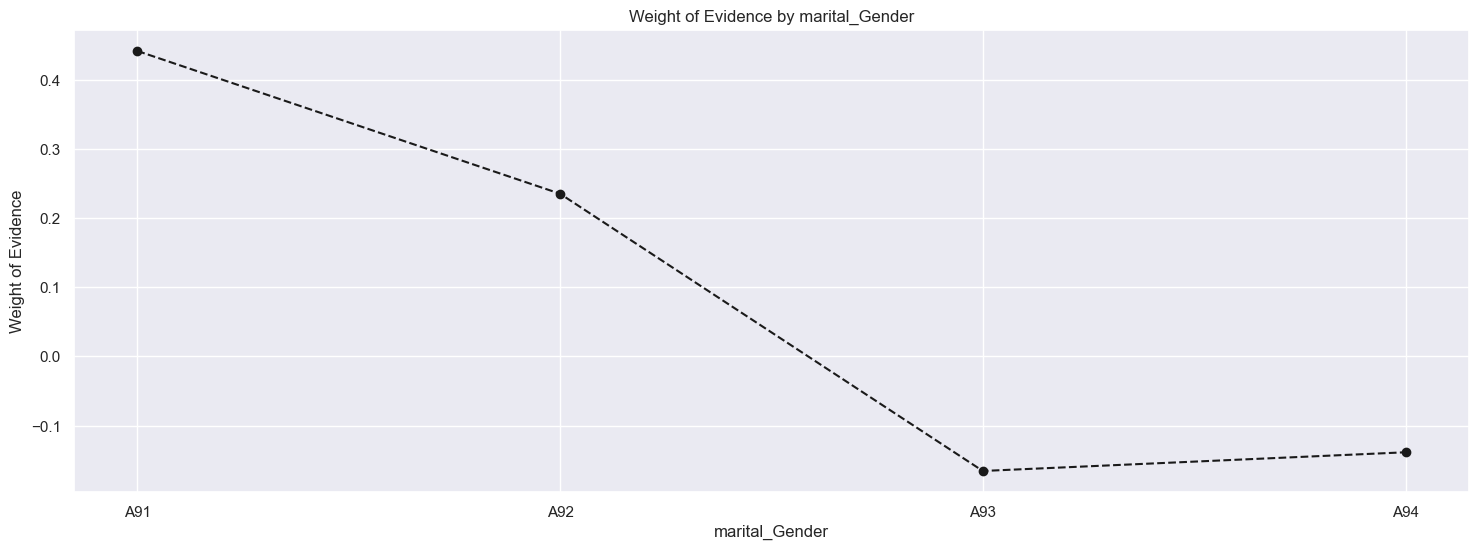

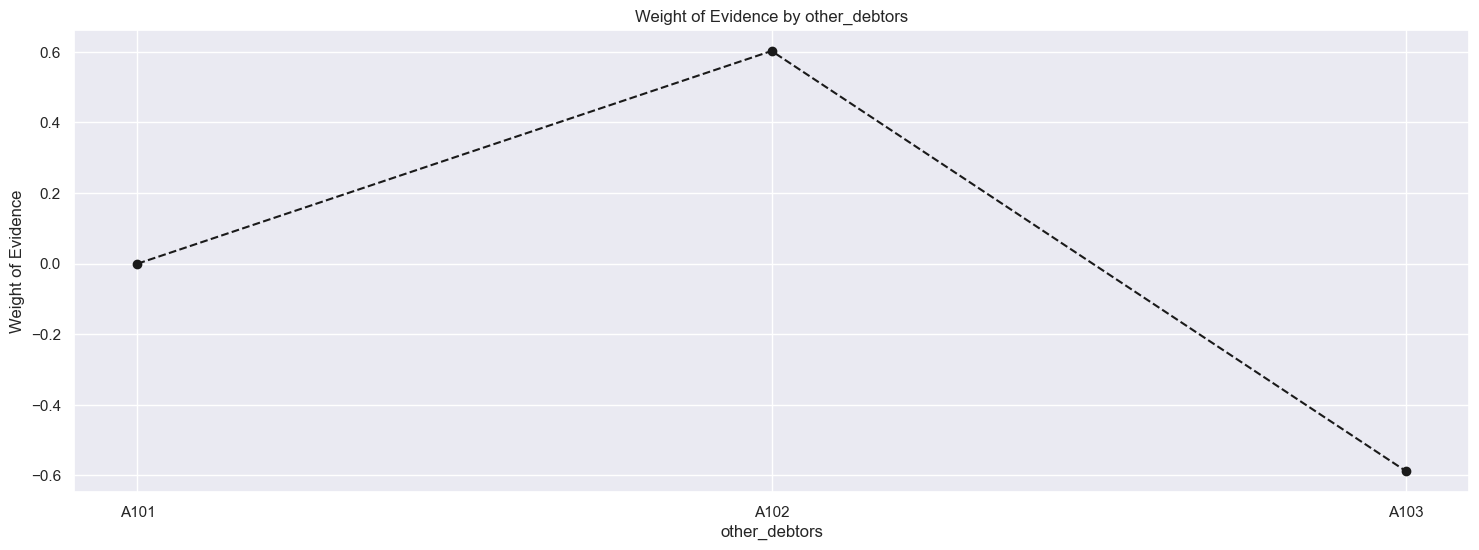

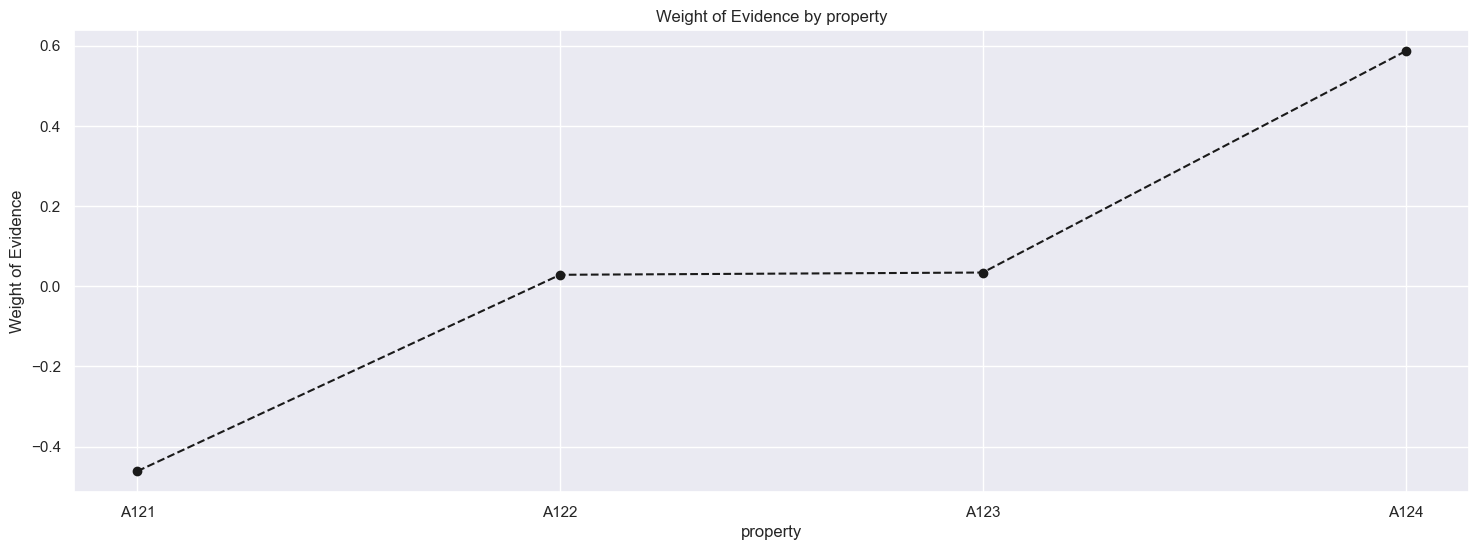

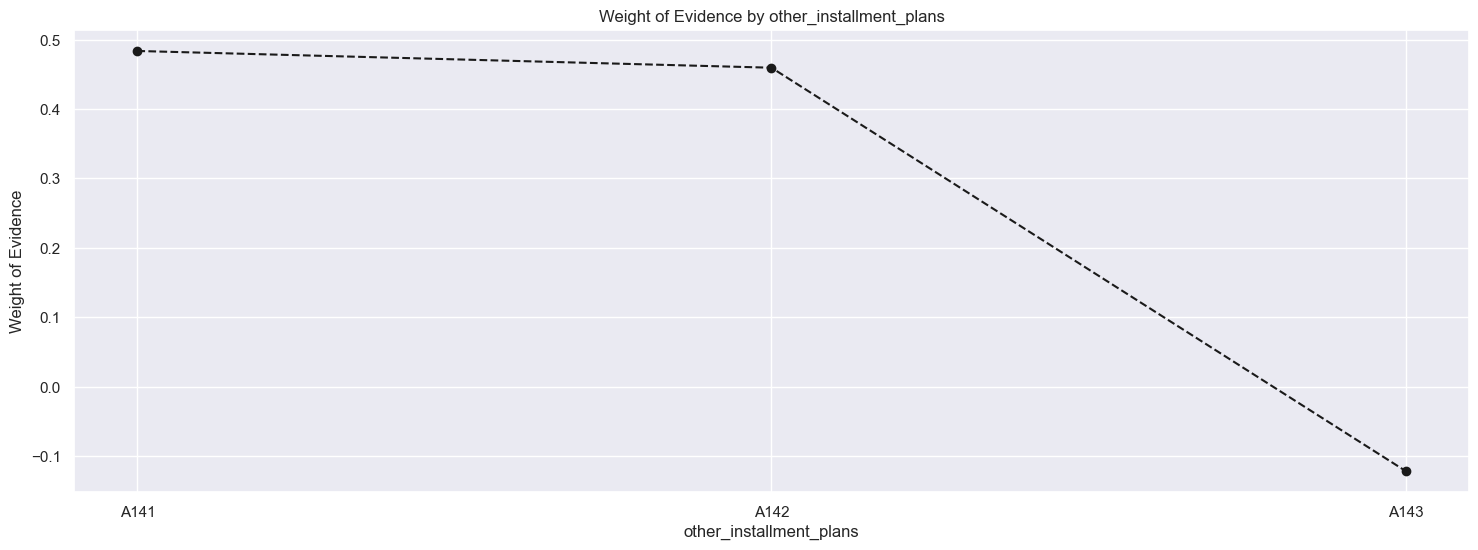

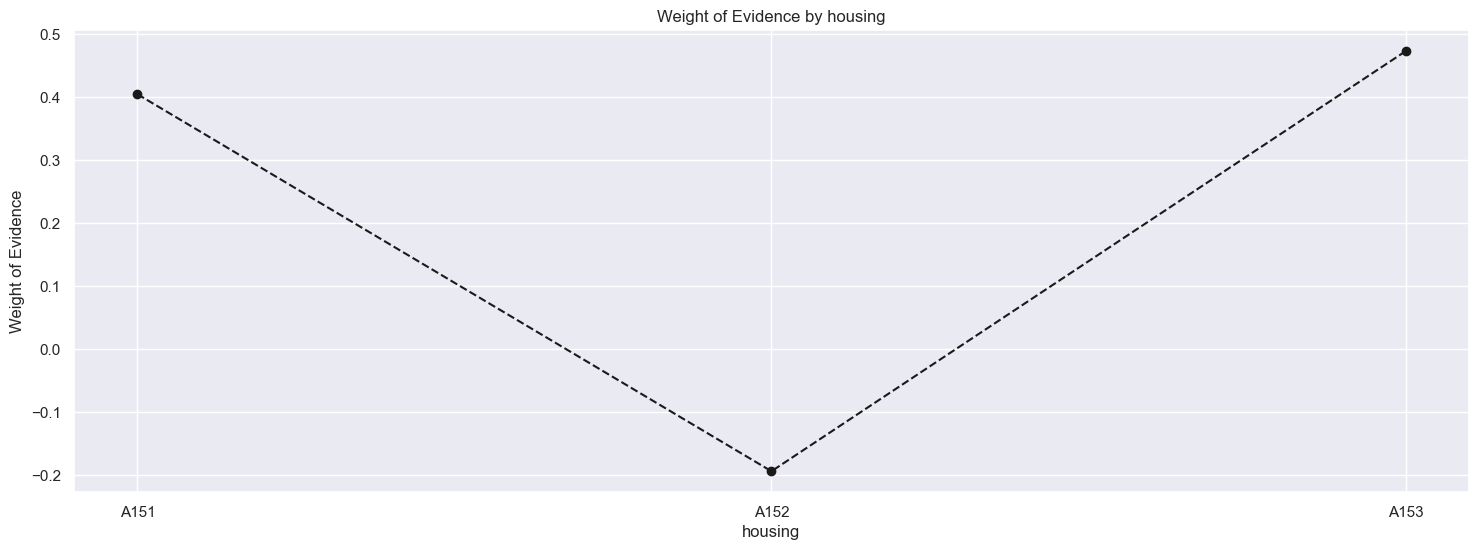

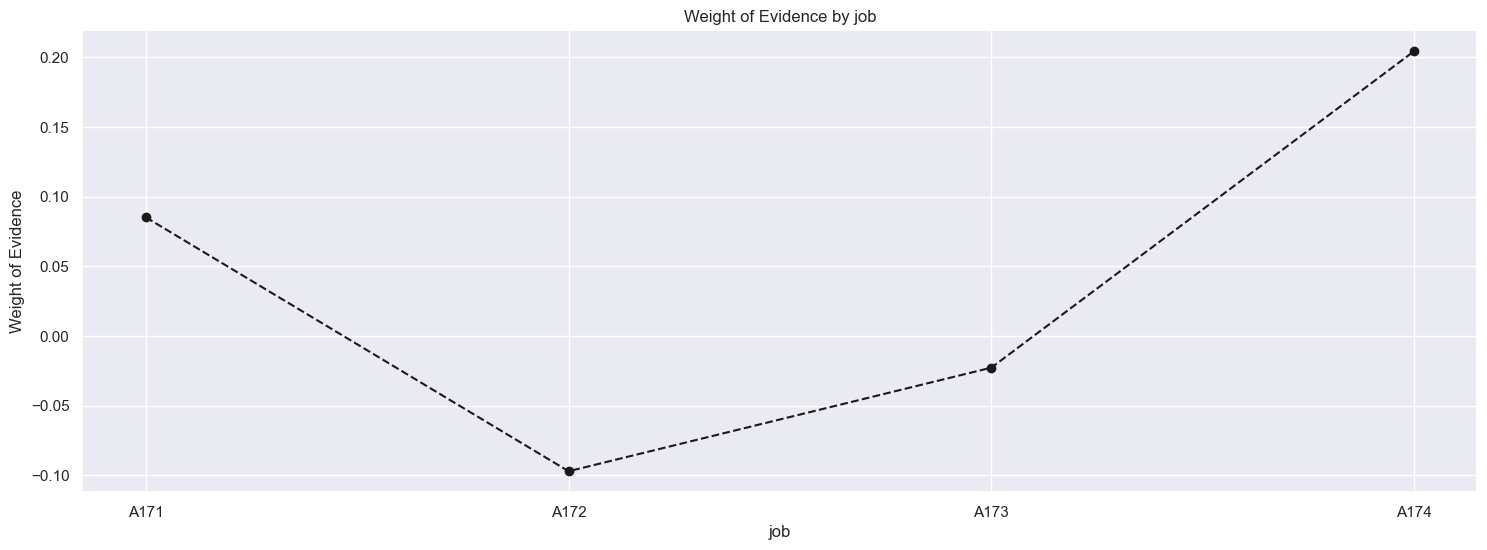

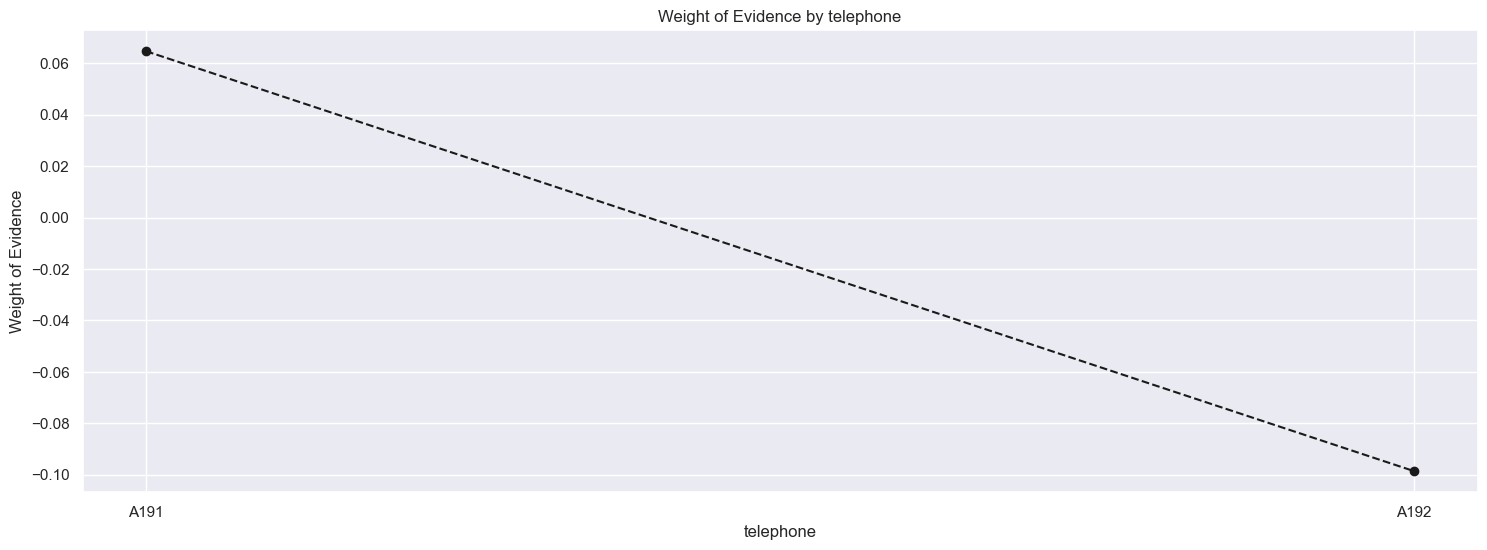

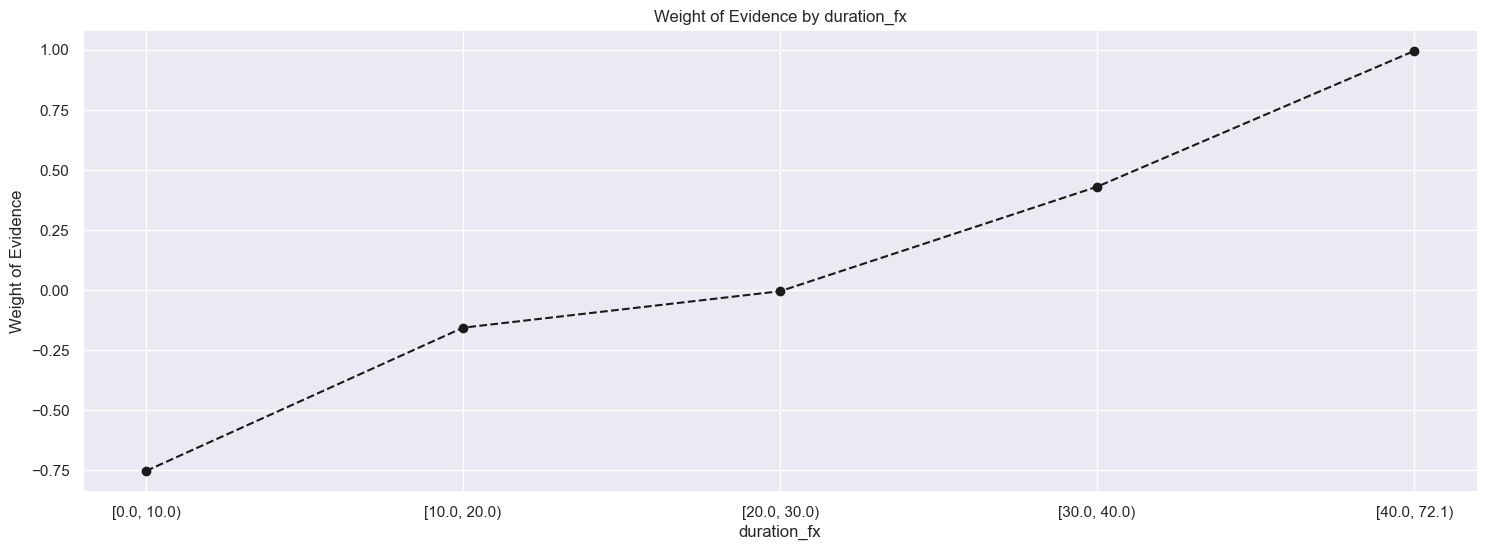

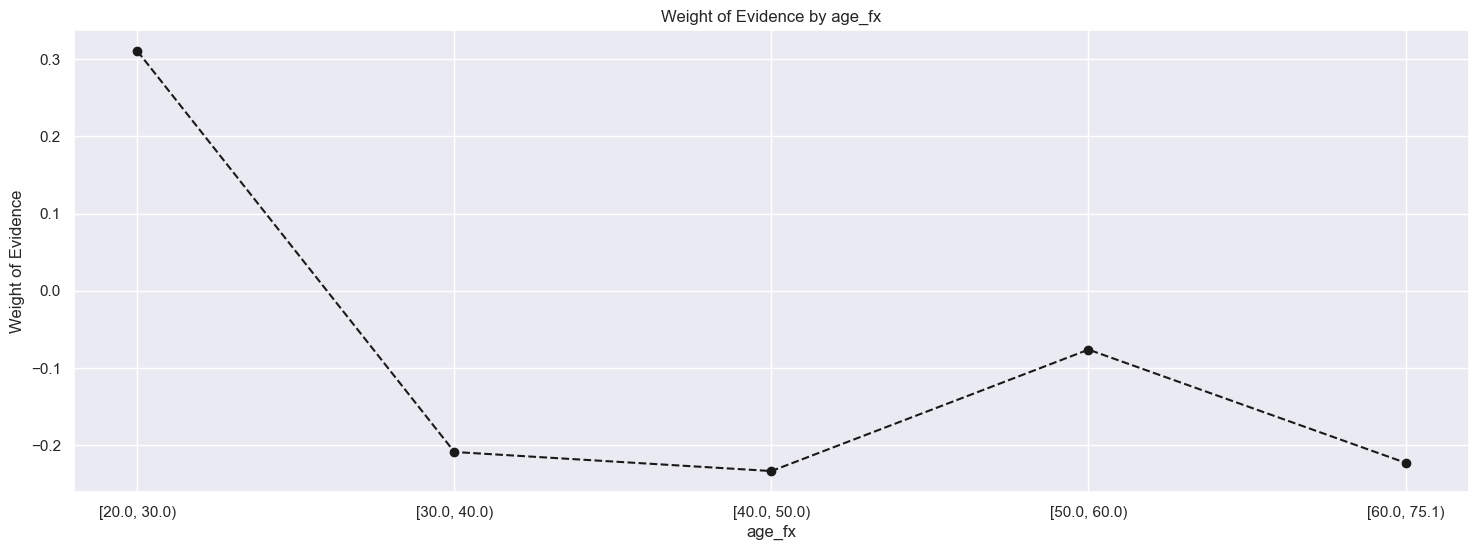

In [75]:
for i in credit.drop(columns=['duration', 'amount', 'present_residence', 'age', 'existing_credits', 'dependents', 
                               'installment_rate', 'foreign_worker', 'credit_risk']).columns:
    
    df_count = pd.crosstab(credit[i], credit['credit_risk'])
    df_woe_iv = (pd.crosstab(credit[i], credit['credit_risk'], normalize='columns')
                 .assign(N_bom=df_count[1])  # Contagem da classe "bom"
                 .assign(N_mau=df_count[2])  # Contagem da classe "mau"
                 .assign(N_total=lambda dfx: dfx['N_bom'] + dfx['N_mau'])  # Total por categoria
                 .assign(prop_N_total=lambda dfx: dfx['N_total'] / len(credit))
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
  
    # Renomear colunas para melhor entendimento
    df_woe_iv = df_woe_iv.rename(columns={
        1: 'prop_bom',
        2: 'prop_mau',
        'N_total': 'N',
        'prop_N_total': 'prop_N'
    })
    
    # Reorganizar colunas
    df_woe_iv = df_woe_iv[['N', 'prop_N', 'N_bom', 'N_mau', 'prop_bom', 'prop_mau', 'woe', 'iv']]
    
    iv_total = df_woe_iv['iv'].sum()
    
    print(f"Variável: {i}")
    print(f"IV Total: {iv_total:.4f}")
    print("\nDataFrame WOE_IV:")
    display(df_woe_iv.round(4))  # Usando display para melhor formatação
    print('-' * 80)
    plot_by_woe(df_woe_iv)